# Statistics of some initialization strategies
### This notebook is based on the Karpathy's nodebook - Stanford CS231N see slide 56 in http://cs231n.stanford.edu/slides/2016/winter1516_lecture5.pdf

### here I use Tensorflow

This notebook shows some statistics of the hidden activations as a result of different weight initializations

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

assume some unit gaussian 500-D input data and batch size of a 1000 points

the network is 10 layers deep, with 500 activations each

In [2]:
data = np.random.rand(1000,500)
hidden_layer_sizes = [500] * 10

define the activations that are available

In [3]:
act = {'relu': tf.nn.relu, 'tanh': tf.nn.tanh, 'elu': tf.nn.elu}

In [4]:
D = tf.placeholder(tf.float64, shape=(data.shape))

The model takes as input a function that is of this form:  `Winitial(fan_in, fan_out)`

nonlin is a list of strings, each one of which can be one of the keys of `act`

`BatchNorm` enables batch normalization as defined in slide number 65 of Karpathy's

In [5]:
def model(Winitial, nonlin, batchNorm=False):
    Hs = [None]*len(hidden_layer_sizes)
    for i in xrange(len(hidden_layer_sizes)):
        X = D if i == 0 else Hs[i-1] # input at this layer
        fan_in = X.get_shape().as_list()[1]
        fan_out = hidden_layer_sizes[i]
        W = tf.Variable(Winitial(fan_in, fan_out)) # layer initialization
        H = tf.matmul(X, W)
        if batchNorm:
            std, var = tf.nn.moments(H, 0)
            H = (H - std)/var
        H = act[nonlin[i]](H)
        Hs[i] = H
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    HsVal = sess.run(Hs, feed_dict={D:data})
    return HsVal

In [6]:
def showStat(HsVal):
    # look at distribution at each layer
    print 'input layer had mean %f and std %f' %(np.mean(data), np.std(data))
    layer_means = [np.mean(H) for H in HsVal]
    layer_stds = [np.std(H) for H in HsVal]
    for i, H in enumerate(HsVal):
        print 'hidden layer %d has mean %f and std %f' % (i+1, layer_means[i], layer_stds[i])
        
    # plot the means and standard deriations
    plt.figure()
    plt.subplot(121)
    plt.plot(range(len(HsVal)), layer_means, 'ob-')
    plt.title('layer mean')
    plt.subplot(122)
    plt.plot(range(len(HsVal)), layer_stds, 'ob-')
    plt.title('layer std')
    
    # plot the raw distributions 
    plt.figure(figsize=(16,4))
    for i, H in enumerate(HsVal):
        plt.subplot(1, len(HsVal), i+1)
        plt.hist(H.ravel(), 30, range=(-1,1))

Naive initialization with small random numbers. Notice what happens to the standard deviation of the activations as one progresses in the layers.

The gradients of activations with respect to the weights are the activations of the previous layer, and these values are very small. Consequently, the gradients will not propagate.

input layer had mean 0.500327 and std 0.288837
hidden layer 1 has mean 0.001573 and std 0.124177
hidden layer 2 has mean -0.000485 and std 0.028219
hidden layer 3 has mean 0.000022 and std 0.006325
hidden layer 4 has mean -0.000091 and std 0.001353
hidden layer 5 has mean 0.000019 and std 0.000305
hidden layer 6 has mean -0.000003 and std 0.000067
hidden layer 7 has mean -0.000000 and std 0.000016
hidden layer 8 has mean -0.000000 and std 0.000004
hidden layer 9 has mean -0.000000 and std 0.000001
hidden layer 10 has mean -0.000000 and std 0.000000


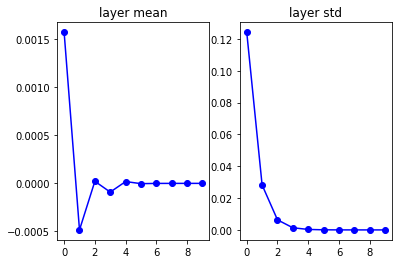

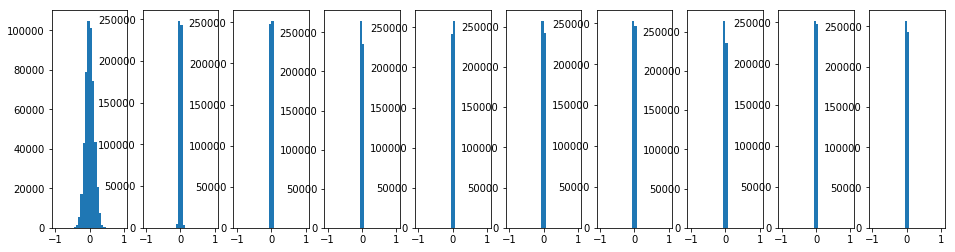

In [7]:
W0 = lambda fan_in, fan_out : np.random.randn(fan_in, fan_out) * 0.01
nonlinearities = ['tanh'] * len(hidden_layer_sizes)
HsVal = model(W0, nonlinearities)
showStat(HsVal)

Using Xavier initializtion, but the std dev still decays a bit

input layer had mean 0.500327 and std 0.288837
hidden layer 1 has mean 0.014459 and std 0.463925
hidden layer 2 has mean 0.011926 and std 0.389737
hidden layer 3 has mean -0.002405 and std 0.337177
hidden layer 4 has mean 0.008661 and std 0.303055
hidden layer 5 has mean -0.005967 and std 0.276544
hidden layer 6 has mean 0.014955 and std 0.263041
hidden layer 7 has mean -0.004870 and std 0.248937
hidden layer 8 has mean 0.001756 and std 0.234755
hidden layer 9 has mean 0.007659 and std 0.217456
hidden layer 10 has mean -0.011090 and std 0.211247


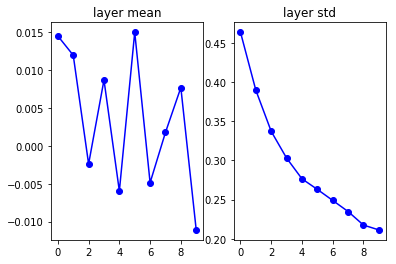

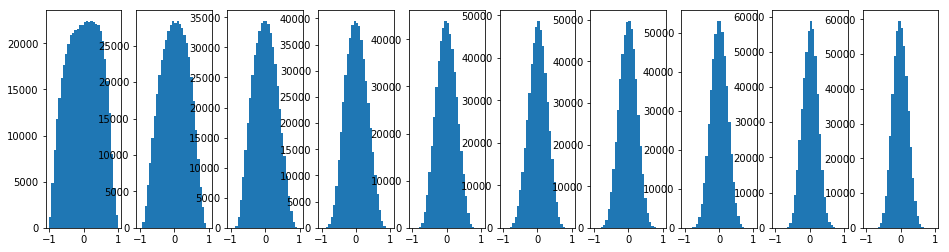

In [8]:
W0 = lambda fan_in, fan_out : np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)
HsVal = model(W0, nonlinearities)
showStat(HsVal)

With relu activations the issue persists.

input layer had mean 0.500327 and std 0.288837
hidden layer 1 has mean 0.213454 and std 0.323856
hidden layer 2 has mean 0.161130 and std 0.225346
hidden layer 3 has mean 0.115511 and std 0.161752
hidden layer 4 has mean 0.079198 and std 0.117294
hidden layer 5 has mean 0.056378 and std 0.081970
hidden layer 6 has mean 0.041299 and std 0.060622
hidden layer 7 has mean 0.026915 and std 0.040298
hidden layer 8 has mean 0.020076 and std 0.029043
hidden layer 9 has mean 0.013686 and std 0.020131
hidden layer 10 has mean 0.009295 and std 0.013692


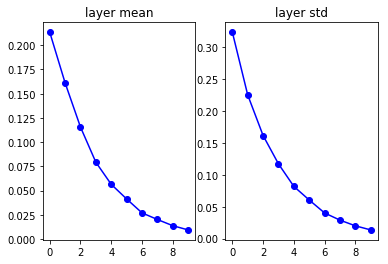

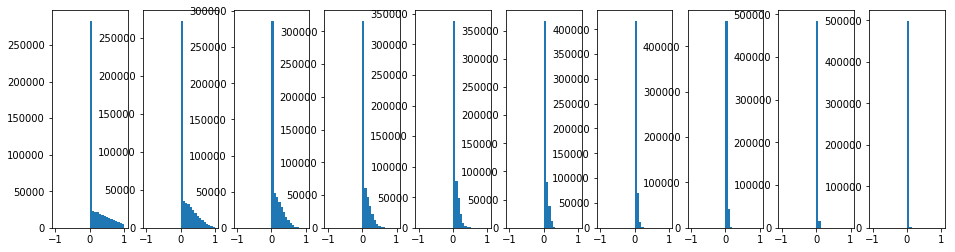

In [9]:
W0 = lambda fan_in, fan_out : np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)
nonlinearities = ['relu'] * len(hidden_layer_sizes)
HsVal = model(W0, nonlinearities)
showStat(HsVal)

According He et al, 2015 a missing fator 2 is missing in the initialization

input layer had mean 0.500327 and std 0.288837
hidden layer 1 has mean 0.317832 and std 0.464071
hidden layer 2 has mean 0.319316 and std 0.468497
hidden layer 3 has mean 0.330652 and std 0.481815
hidden layer 4 has mean 0.325272 and std 0.473186
hidden layer 5 has mean 0.324561 and std 0.463949
hidden layer 6 has mean 0.328358 and std 0.464107
hidden layer 7 has mean 0.262982 and std 0.435062
hidden layer 8 has mean 0.274700 and std 0.408836
hidden layer 9 has mean 0.292327 and std 0.426315
hidden layer 10 has mean 0.324799 and std 0.445963


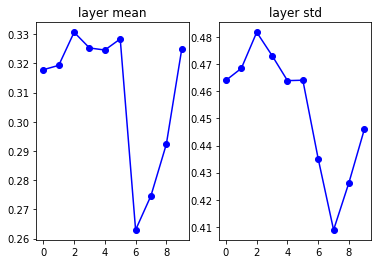

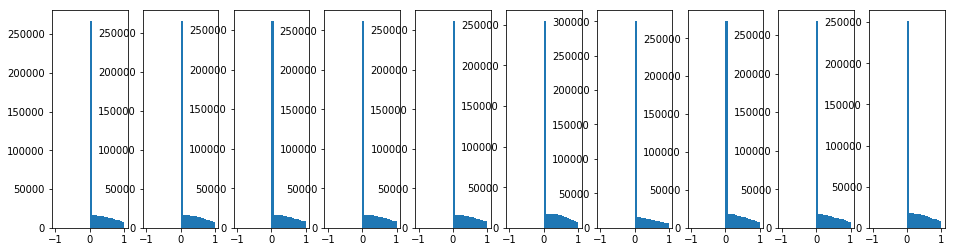

In [10]:
W0 = lambda fan_in, fan_out : np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2.0)
nonlinearities = ['relu'] * len(hidden_layer_sizes)
HsVal = model(W0, nonlinearities)
showStat(HsVal)

With Batch Normalization

input layer had mean 0.500327 and std 0.288837
hidden layer 1 has mean 0.126970 and std 0.672952
hidden layer 2 has mean 0.124149 and std 0.747343
hidden layer 3 has mean 0.152447 and std 0.801995
hidden layer 4 has mean 0.207104 and std 0.906119
hidden layer 5 has mean 0.295578 and std 0.991394
hidden layer 6 has mean 0.285720 and std 1.089218
hidden layer 7 has mean 0.357178 and std 1.227394
hidden layer 8 has mean 0.345201 and std 1.300653
hidden layer 9 has mean 0.379734 and std 1.369457
hidden layer 10 has mean 0.440261 and std 1.409092


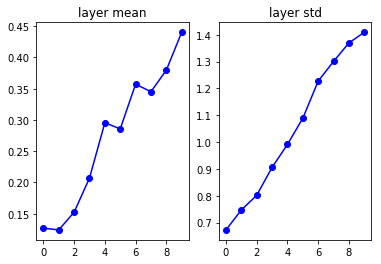

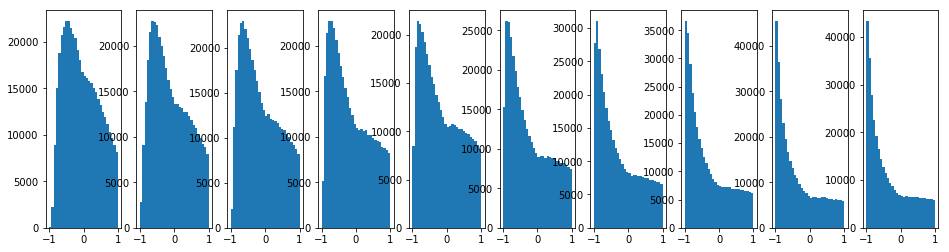

In [11]:
W0 = lambda fan_in, fan_out : np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2.0)
nonlinearities = ['elu'] * len(hidden_layer_sizes)
HsVal = model(W0, nonlinearities)
showStat(HsVal)

input layer had mean 0.500327 and std 0.288837
hidden layer 1 has mean 0.000000 and std 0.151857
hidden layer 2 has mean 0.000049 and std 0.273858
hidden layer 3 has mean 0.000012 and std 0.160431
hidden layer 4 has mean 0.000020 and std 0.261921
hidden layer 5 has mean 0.000002 and std 0.167336
hidden layer 6 has mean -0.000013 and std 0.252880
hidden layer 7 has mean -0.000002 and std 0.172981
hidden layer 8 has mean -0.000005 and std 0.247832
hidden layer 9 has mean 0.000004 and std 0.177322
hidden layer 10 has mean 0.000062 and std 0.240039


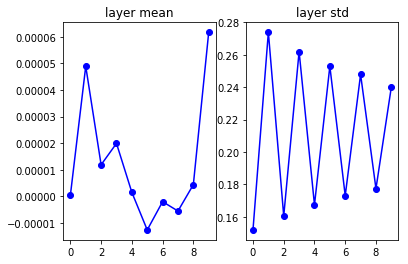

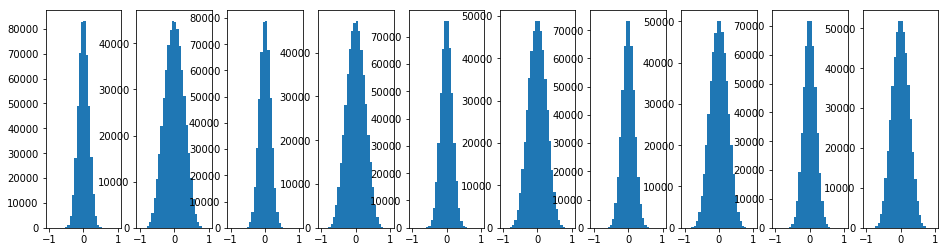

In [12]:
W0 = lambda fan_in, fan_out : np.random.randn(fan_in, fan_out)
nonlinearities = ['tanh'] * len(hidden_layer_sizes)
HsVal = model(W0, nonlinearities, batchNorm=True)
showStat(HsVal)